In [1]:
from sympy import *
init_printing()
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt
%matplotlib inline

## Generic fit for approximating with a polynomial

In [2]:
f = Symbol('f')  # Function to approximate
f_approx = Symbol('fbar')   # Approximating function
w = Symbol('w') # weighting function
chi2 = Symbol('chi^2')

f, f_approx, w, chi2

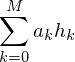

In [12]:
M = Symbol('M', integer=True)
k = Symbol('k', integer=True,positive=True)
a = IndexedBase('a',(M,))  # coefficient
h = IndexedBase('h',(M,))  # basis function
ak = Symbol('a_k')  # Temporary symbols to make some derivatives easier
hk = Symbol('h_k')  #    Basis function (function of r)
hj = Symbol('h_j')
r = Symbol('r',positive=True)
j = Symbol('j',integer=True)
poly_approx = Sum(a[k]*h[k],(k,0,M))
poly_approx_j = Sum(a[j]*h[j],(j,0,M)) # replace summation variable
poly_approx

Define a quality-of-fit measure, $\chi^2$

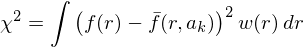

In [4]:
eq1 = Eq(chi2, Integral(w(r)*(f(r)-f_approx(r,ak))**2,r))
eq1

We want to minimized $\chi^2$. Take derivative wrt the coefficients ($a_k$) and set to zero.  Will get $k$ equations.

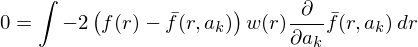

In [5]:
eq2 = Eq(0,diff(eq1.rhs, ak))
eq2

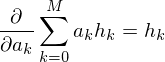

In [6]:
eq3 = Eq(diff(poly_approx,ak,evaluate=False), hk)
eq3

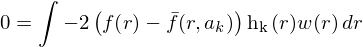

In [7]:
eq4 = Eq(0, Integral(eq2.rhs.args[0].subs(diff(f_approx(r,ak),ak),hk(r)),r))
eq4

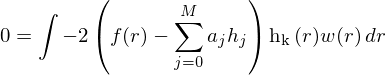

In [8]:
eq5 = Eq(0, Integral(eq4.rhs.args[0].subs(f_approx(r,ak), poly_approx_j),r))
eq5

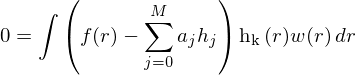

In [9]:
eq6 = Eq(0, Integral(-eq5.rhs.args[0]/2,r))
eq6

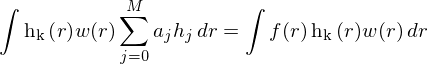

In [10]:
base7 = expand(eq6.rhs.args[0])
eq7 = Eq(Integral(-base7.args[1],r),Integral(base7.args[0],r))
eq7

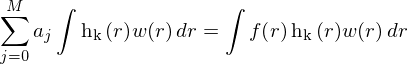

In [11]:
int7 = eq7.lhs.args[0]
eq8 = Eq(Sum(a[j]*Integral(Mul(*int7.args[1:]),r),(j,0,M)), eq7.rhs)
eq8

Finally, we get a linear system - the lhs is a matrix times a vector of coefficients and the rhs is a vector of values.